In [1]:
try: import fastkaggle
except ModuleNotFoundError:
    !pip install -Uq fastkaggle

In [2]:
from fastkaggle import *

In [3]:
# for working with paths in Python, I recommend using `pathlib.Path`
from pathlib import Path

cred_path = Path('~/.kaggle/kaggle.json').expanduser()
if not iskaggle and not cred_path.exists():
    creds = ''
    cred_path.parent.mkdir(exist_ok=True)
    cred_path.write_text(creds)
    cred_path.chmod(0o600)

In [4]:
comp = 'playground-series-s4e8'

path = setup_comp(comp, install='fastai')

In [5]:
path

Path('playground-series-s4e8')

In [6]:
import functools
import itertools
from fastai.tabular.all import *

path.ls()

(#3) [Path('playground-series-s4e8/train.csv'),Path('playground-series-s4e8/test.csv'),Path('playground-series-s4e8/sample_submission.csv')]

In [7]:
df = pd.read_csv(path/'train.csv')
df

,id,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,0,e,8.80,f,s,u,f,a,c,w,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,a
1,1,p,4.51,x,h,o,f,a,c,n,...,NaN,y,o,NaN,NaN,t,z,NaN,d,w
2,2,e,6.94,f,s,b,f,x,c,w,...,NaN,s,n,NaN,NaN,f,f,NaN,l,w
3,3,e,3.88,f,y,g,f,s,NaN,g,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,u
4,4,e,5.85,x,l,w,f,d,NaN,w,...,NaN,NaN,w,NaN,NaN,f,f,NaN,g,a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3116940,3116940,e,9.29,f,NaN,n,t,NaN,NaN,w,...,b,NaN,w,u,w,t,g,NaN,d,u
3116941,3116941,e,10.88,s,NaN,w,t,d,c,p,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,u
3116942,3116942,p,7.82,x,e,e,f,a,NaN,w,...,NaN,NaN,y,NaN,w,t,z,NaN,d,a
3116943,3116943,e,9.45,p,i,n,t,e,NaN,p,...,NaN,y,w,NaN,NaN,t,p,NaN,d,u


In [8]:
df.head()

,id,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,0,e,8.80,f,s,u,f,a,c,w,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,a
1,1,p,4.51,x,h,o,f,a,c,n,...,NaN,y,o,NaN,NaN,t,z,NaN,d,w
2,2,e,6.94,f,s,b,f,x,c,w,...,NaN,s,n,NaN,NaN,f,f,NaN,l,w
3,3,e,3.88,f,y,g,f,s,NaN,g,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,u
4,4,e,5.85,x,l,w,f,d,NaN,w,...,NaN,NaN,w,NaN,NaN,f,f,NaN,g,a


In [23]:
df.tail()

,id,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
3116940,3116940,e,9.29,f,NaN,n,t,NaN,NaN,w,...,b,NaN,w,u,w,t,g,NaN,d,u
3116941,3116941,e,10.88,s,NaN,w,t,d,c,p,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,u
3116942,3116942,p,7.82,x,e,e,f,a,NaN,w,...,NaN,NaN,y,NaN,w,t,z,NaN,d,a
3116943,3116943,e,9.45,p,i,n,t,e,NaN,p,...,NaN,y,w,NaN,NaN,t,p,NaN,d,u
3116944,3116944,p,3.20,x,s,g,f,d,c,w,...,NaN,NaN,w,NaN,NaN,f,f,NaN,g,u


In [10]:
df.isna().sum()

id                            0
class                         0
cap-diameter                  4
cap-shape                    40
cap-surface              671023
cap-color                    12
does-bruise-or-bleed          8
gill-attachment          523936
gill-spacing            1258435
gill-color                   57
stem-height                   0
stem-width                    0
stem-root               2757023
stem-surface            1980861
stem-color                   38
veil-type               2957493
veil-color              2740947
has-ring                     24
ring-type                128880
spore-print-color       2849682
habitat                      45
season                        0
dtype: int64

In [13]:
df.mode().iloc[0]

id                         0
class                      p
cap-diameter            1.49
cap-shape                  x
cap-surface                t
cap-color                  n
does-bruise-or-bleed       f
gill-attachment            a
gill-spacing               c
gill-color                 w
stem-height             5.24
stem-width              2.41
stem-root                  b
stem-surface               s
stem-color                 w
veil-type                  u
veil-color                 w
has-ring                   f
ring-type                  f
spore-print-color          k
habitat                    d
season                     a
Name: 0, dtype: object

In [14]:
modes = df.mode().iloc[0]
df.fillna(modes, inplace=True)

In [15]:
df.isna().sum()

id                      0
class                   0
cap-diameter            0
cap-shape               0
cap-surface             0
cap-color               0
does-bruise-or-bleed    0
gill-attachment         0
gill-spacing            0
gill-color              0
stem-height             0
stem-width              0
stem-root               0
stem-surface            0
stem-color              0
veil-type               0
veil-color              0
has-ring                0
ring-type               0
spore-print-color       0
habitat                 0
season                  0
dtype: int64

In [24]:
pd.unique(df['class'])

array(['e', 'p'], dtype=object)

In [12]:
data_paths = list(filter(lambda x: str(x) != "tpu-getting-started/sample_submission.csv", path.ls()))
data_paths = [path/'tfrecords-jpeg-224x224']
data_paths = functools.reduce(lambda acc, path: list(itertools.chain(acc, (path/'train').ls(), (path/'val').ls())), data_paths, [])

In [13]:
import tensorflow as tf

# https://www.tensorflow.org/tutorials/load_data/tfrecord#reading_a_tfrecord_file_in_python
def load_tfrecs(data_paths, is_test=False):
    data = []
    raw_dataset = tf.data.TFRecordDataset(data_paths)
    
    for record in raw_dataset:
        example = tf.train.Example()
        example.ParseFromString(record.numpy())
        datum = [
            None if is_test else example.features.feature['class'].int64_list.value[0],
            example.features.feature['image'].bytes_list.value[0],
            example.features.feature['id'].bytes_list.value[0],
        ]
        data.append(datum)
        
    return data

data = load_tfrecs(data_paths)
    
len(data)

2024-07-25 10:07:51.004877: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-25 10:07:51.078520: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-25 10:07:51.098374: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-25 10:07:51.202083: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-25 10:07:52.968187: W tensorflow/compiler/tf2

16465

(224, 224)


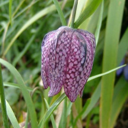

In [14]:
img = PILImage.create(data[0][1])
print(img.size)
img.to_thumb(128)

In [15]:
from fastcore.parallel import *

def f(o): return PILImage.create(o[1]).size
sizes = parallel(f, data, n_workers=8)
pd.Series(sizes).value_counts()

(224, 224)    16465
Name: count, dtype: int64

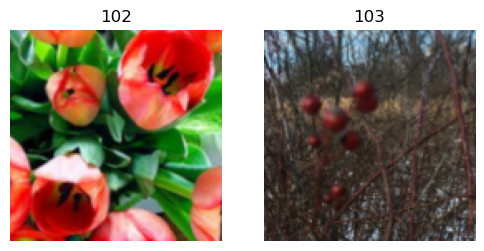

In [16]:
def get_items(data, *args, **kwargs): return data

get_x = lambda entry: PILImage.create(io.BytesIO(entry[1]))
get_y = lambda entry: entry[0]

block = DataBlock(blocks=(ImageBlock, CategoryBlock), 
                  get_items=get_items,
                  get_x=get_x,
                  get_y=get_y,
                  splitter=IndexSplitter(range(12753, len(data))),
                  item_tfms=[Resize(192, method='squish')],
                  batch_tfms=[*aug_transforms(size=128, min_scale=0.75)])

dls = block.dataloaders(data, bs=2)
dls.show_batch(max_n=6)

In [17]:
from torcheval.metrics.functional import multiclass_f1_score

learn = vision_learner(dls, 'convnext_small_in22k', metrics=multiclass_f1_score, path='.', cbs=GradientAccumulation(64)).to_fp16()

/nix/store/i3j0gl8kmy0xly00r8qzjgkfywgbhmz6-python3-3.11.9-env/lib/python3.11/site-packages/timm/models/_factory.py:117: UserWarning: Mapping deprecated model name convnext_small_in22k to current convnext_small.fb_in22k.
  model = create_fn(


In [20]:
import gc
gc.collect()
torch.cuda.empty_cache()

/nix/store/i3j0gl8kmy0xly00r8qzjgkfywgbhmz6-python3-3.11.9-env/lib/python3.11/site-packages/torch/amp/autocast_mode.py:250: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(
/nix/store/i3j0gl8kmy0xly00r8qzjgkfywgbhmz6-python3-3.11.9-env/lib/python3.11/site-packages/torch/amp/grad_scaler.py:131: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn(


SuggestedLRs(valley=0.0012022644514217973, slide=2.75422871709452e-06)

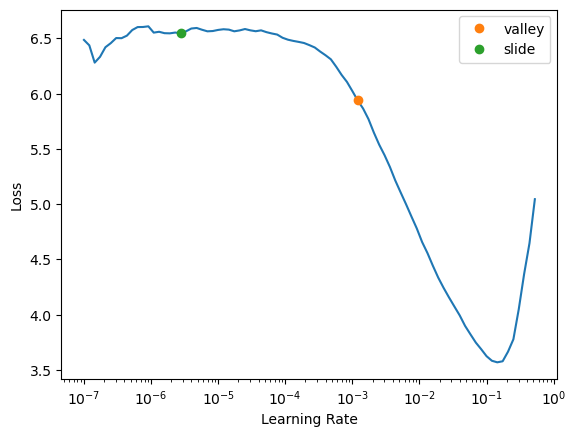

In [12]:
learn.lr_find(suggest_funcs=(valley, slide))

In [ ]:
learn.fine_tune(5, 0.001)

In [21]:
sample_submission = pd.read_csv(path/'sample_submission.csv')
sample_submission

,id,label
0,b48c962e0,0
1,a13d3dfa4,0
2,94269c190,0
3,bcb18c6e4,0
4,d15a4d94c,0
...,...,...
7377,3744d58d1,0
7378,075602d66,0
7379,b4d954bdc,0
7380,f84335116,0


In [22]:
# torch.save(learn.model.state_dict(), '01.pth')
# from google.colab import files
# files.download('model_state_dict.pth')
# learn = vision_learner(dls, 'convnext_small_in22k', metrics=multiclass_f1_score, path='.').to_fp16()
# learn.model.load_state_dict(torch.load('01.pth'))

# learn = vision_learner(dls, 'convnext_small_in22k', metrics=multiclass_f1_score, path='.').to_fp16()
# learn.model.load_state_dict(torch.load('01.pth', map_location=torch.device('cpu')))

/nix/store/56b4a5nvbh90f4dnccbz89kbj0sqy6wk-python3-3.11.9-env/lib/python3.11/site-packages/timm/models/_factory.py:117: UserWarning: Mapping deprecated model name convnext_small_in22k to current convnext_small.fb_in22k.
  model = create_fn(


<All keys matched successfully>

In [19]:
test_paths = [(path/'tfrecords-jpeg-224x224/test').ls()]
test_data = load_tfrecs(test_paths, is_test=True)
len(test_data)

7382

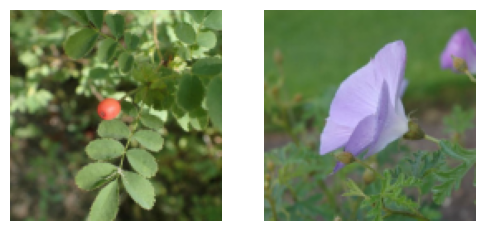

In [20]:
test_dataloader = dls.test_dl(test_data)
test_dataloader.show_batch(max_n=6)

In [25]:
output = learn.get_preds(dl=test_dataloader, with_decoded=True)
probs,_,idxs = output

/nix/store/56b4a5nvbh90f4dnccbz89kbj0sqy6wk-python3-3.11.9-env/lib/python3.11/site-packages/torch/amp/autocast_mode.py:250: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(
/nix/store/56b4a5nvbh90f4dnccbz89kbj0sqy6wk-python3-3.11.9-env/lib/python3.11/site-packages/torch/amp/grad_scaler.py:131: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn(


In [26]:
idxs

tensor([103,  54,  69,  ...,  53,  41, 102])

In [27]:
learn.dls.vocab

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103]

In [28]:
vocab = np.array(learn.dls.vocab)
results = pd.Series(vocab[idxs], name="label")
results

0       103
1        54
2        69
3        79
4         4
       ... 
7377    103
7378     93
7379     53
7380     41
7381    102
Name: label, Length: 7382, dtype: int64

In [29]:
ids = pd.Series([datum[2].decode('utf-8') for datum in test_data], name="id")
ids

0       00e4f514e
1       6fd484575
2       c3194a1e8
3       b7b3939ca
4       9a4cb2829
          ...    
7377    2a608c0db
7378    d82a21bbd
7379    f9c931893
7380    18c7b92b8
7381    523df966b
Name: id, Length: 7382, dtype: object

In [30]:
submission = pd.DataFrame({'id': ids, 'label': results})
submission.to_csv('submission.csv', header=True, index=False)

In [31]:
!head submission.csv

id,label
00e4f514e,103
6fd484575,54
c3194a1e8,69
b7b3939ca,79
9a4cb2829,4
cc0db3719,48
66e6f6938,83
f028e8401,90
04c9322f3,18


In [32]:
# if not iskaggle:
#    from kaggle import api
#    api.competition_submit_cli('submission.csv', 'petals-to-the-metal-01', comp)

In [33]:
if not iskaggle:
    push_notebook('alexchalk', 'petals-to-the-metal-submission-01',
                  title='Petals to the Metal Submission 01',
                  file='01.ipynb',
                  competition=comp, private=True, gpu=False)

Kernel version 17 successfully pushed.  Please check progress at https://www.kaggle.com/code/alexchalk/petals-to-the-metal-submission-01
